## Fraud Detection Notebook using Machine Learning

In [2]:
!pip install ydata_profiling

In [3]:
!pip install lightgbm

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import ipaddress
from ydata_profiling import ProfileReport
%matplotlib inline
from sklearn import preprocessing
plt.rc("font", size=14)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from lightgbm import LGBMClassifier
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [12]:

import pandas as pd

df = pd.read_csv('fraud_dataset.csv')
print(df.head())
print(df.shape)

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0             5849   
1       1        1           1          1              1             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              1             2583   
4       1        0           0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Term  Credit_History_Available  \
0                  0         146        360                         1   
1               1508         128        360                         1   
2                  0          66        360                         1   
3               2358         120        360                         1   
4                  0         141        360                         1   

   Housing  Locality  Fraud_Risk  
0        1         1           0  
1        1         3        

In [13]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 24.06it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### We can observe that there are no missing values and no duplicates. We can do detailed analysis of each attribute to understand the data better. 

In [14]:
count_fraud = len(df[df['Fraud_Risk']==0])
count_non_fraud = len(df[df['Fraud_Risk']==1])
pct_of_non_fraud = count_non_fraud/(count_non_fraud +count_fraud)
print("percentage of non Fraud Risk is", round(pct_of_non_fraud*100,2))
pct_of_fraud = count_fraud/(count_non_fraud +count_fraud)
print("percentage of Fraud Risk", round(pct_of_fraud*100,2))

percentage of non Fraud Risk is 57.68
percentage of Fraud Risk 42.32


## Plot the target attribute

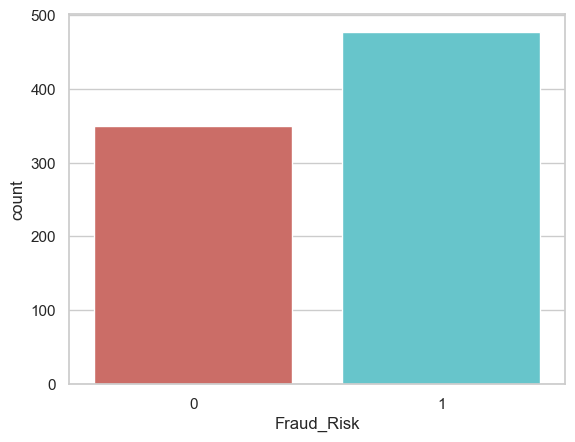

In [15]:
sns.countplot(x='Fraud_Risk',data=df, palette='hls')
plt.show()

In [16]:
df.groupby('Fraud_Risk').mean()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality
Fraud_Risk,,,,,,,,,,,,
0,0.574286,0.000000,0.308571,0.808571,0.177143,4779.974286,1092.642857,125.611429,346.685714,0.974286,0.700000,2.005714
1,0.851153,0.834382,0.905660,0.777778,0.865828,5530.683438,1774.714885,152.104822,331.849057,0.819706,0.620545,1.958071


In [17]:
df.corr(method ='pearson') 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
Gender,1.000000,0.355319,0.121868,-0.080883,0.256583,0.010382,0.116468,0.089613,-0.074194,-0.019499,-0.006226,-0.002798,0.309570
Married,0.355319,1.000000,0.375512,-0.034168,0.829158,0.071710,0.106108,0.175254,-0.108588,-0.085615,-0.093419,-0.019892,0.825064
Dependents,0.121868,0.375512,1.000000,-0.025549,0.349978,0.130331,0.026961,0.182559,-0.050031,-0.085019,-0.022433,-0.012152,0.315421
Education,-0.080883,-0.034168,-0.025549,1.000000,-0.027868,0.127969,0.050707,0.154714,0.109241,0.057124,0.001073,-0.103206,-0.037406
Self_Employed,0.256583,0.829158,0.349978,-0.027868,1.000000,0.138274,0.078241,0.229533,-0.104434,-0.049356,-0.106595,-0.049677,0.688170
ApplicantIncome,0.010382,0.071710,0.130331,0.127969,0.138274,1.000000,-0.120363,0.564923,-0.004199,-0.022038,-0.049480,-0.018499,0.066347
CoapplicantIncome,0.116468,0.106108,0.026961,0.050707,0.078241,-0.120363,1.000000,0.165940,-0.054756,-0.035843,-0.018713,0.003190,0.120304
LoanAmount,0.089613,0.175254,0.182559,0.154714,0.229533,0.564923,0.165940,1.000000,0.073583,-0.024920,-0.084477,0.022021,0.164087
Loan_Term,-0.074194,-0.108588,-0.050031,0.109241,-0.104434,-0.004199,-0.054756,0.073583,1.000000,0.076045,0.026219,0.084809,-0.097339
Credit_History_Available,-0.019499,-0.085615,-0.085019,0.057124,-0.049356,-0.022038,-0.035843,-0.024920,0.076045,1.000000,0.017112,-0.005251,-0.239512


We can observe strong positive co-relation between the attributes Married & Self Employed to the target variable which is Fraud Risk.

### Select input and target variables

In [18]:
X = df[df.columns[0:12]]
y = df[df.columns[12:]]

In [19]:
df.dtypes

Gender                      int64
Married                     int64
Dependents                  int64
Education                   int64
Self_Employed               int64
ApplicantIncome             int64
CoapplicantIncome           int64
LoanAmount                  int64
Loan_Term                   int64
Credit_History_Available    int64
Housing                     int64
Locality                    int64
Fraud_Risk                  int64
dtype: object

We can observe that all the attributes are in Int data type.

## Check for null values

In [20]:
df.isna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Term,Credit_History_Available,Housing,Locality,Fraud_Risk
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,False,False,False,False,False,False,False,False,False,False,False,False,False
823,False,False,False,False,False,False,False,False,False,False,False,False,False
824,False,False,False,False,False,False,False,False,False,False,False,False,False
825,False,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Splitting the data with 70:30 mix

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
print("Train_x Shape :: ", X_train.shape)
print("Train_y Shape :: ", y_train.shape)
print("Test_x Shape :: ", X_test.shape)
print("Test_y Shape :: ", y_test.shape)

Train_x Shape ::  (578, 12)
Train_y Shape ::  (578, 1)
Test_x Shape ::  (249, 12)
Test_y Shape ::  (249, 1)


In [24]:
d_train = lgb.Dataset(X_train, label=y_train)

Building the model with default parameters

In [25]:
def LGBM_classifier(features, target):
    """
    To train the LGBM classifier with features and target data
    :param features:
    :param target:
    :return: trained LGBM classifier
    """
    model = LGBMClassifier(metric='binary_logloss', objective='binary')
    model.fit(features, target)
    return model

start = time.time()
trained_model = LGBM_classifier(X_train, y_train.values.ravel())
print("> Completion Time : ", time.time() - start)
print("Trained LGBM model :: ", trained_model)
predictions = trained_model.predict(X_test)

[LightGBM] [Info] Number of positive: 338, number of negative: 240
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 435
[LightGBM] [Info] Number of data points in the train set: 578, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.584775 -> initscore=0.342407
[LightGBM] [Info] Start training from score 0.342407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [26]:
print("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("LGBM Model Test Accuracy is :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  1.0
LGBM Model Test Accuracy is ::  0.927710843373494


We can observe that the model has achieved 92% accuracy on test data and 100% accuracy on train data.

In [27]:
print(" Confusion matrix ", confusion_matrix(y_test, predictions))

 Confusion matrix  [[108   2]
 [ 16 123]]


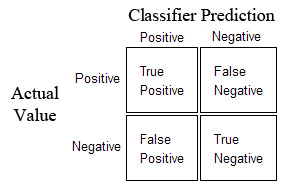

In [28]:
feat_imp = pd.Series(trained_model.feature_importances_, index=X.columns)
feat_imp.nlargest(12).plot(kind='barh', figsize=(8,10))

<Axes: >

Feature importance as per the model

### SHAP (SHapley Additive exPlanations) is a unified approach to explain the output of any machine learning model. 

In [29]:
!pip install shap

   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   -------------------------------------- - 524.3/545.3 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 545.3/545.3 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1


In [30]:
import shap
shap.initjs()

In [31]:
shap_values = shap.TreeExplainer(trained_model.booster_).shap_values(X_train)

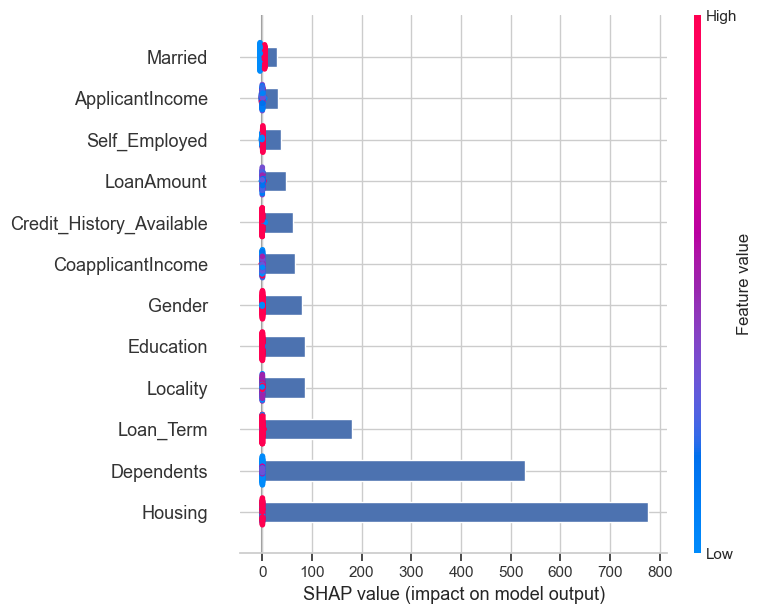

In [32]:
shap.summary_plot(shap_values, X_train)

We can observe that attributes like Married, ApplicantIncome, Credit_History_Available, LoanAMount & CoapplicantIncome have high impact on the target variable. 

### In this project, a LightGBM model was successfully built to predict fraud risk, achieving a test accuracy of 92.3%.
### The analysis using SHAP revealed that features like an applicant's Married and Self_Employed status are the most significant predictors. This model provides a strong foundation for a system that can proactively flag high-risk applications. 

In [35]:
import json
# The data from your sample_data.json file
new_applicant_data = {
    "fields": ["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Term", "Credit_History_Available", "Housing", "Locality"],
    "values": [[1, 0, 0, 0, 0, 3748, 1668, 110, 360, 1, 0, 2]]
}

# Convert it into a pandas DataFrame
new_df = pd.DataFrame(new_applicant_data['values'], columns=new_applicant_data['fields'])

# Use your trained model to make a prediction
prediction = trained_model.predict(new_df)
prediction_probability = trained_model.predict_proba(new_df)

print("New Applicant Data:")
print(new_df)
print("\\n----")
print(f"Prediction (0 = No Fraud, 1 = Fraud Risk): {prediction[0]}")
print(f"Prediction Probability ([No Fraud, Fraud Risk]): {prediction_probability[0]}")

New Applicant Data:
   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          0              0             3748   

   CoapplicantIncome  LoanAmount  Loan_Term  Credit_History_Available  \
0               1668         110        360                         1   

   Housing  Locality  
0        0         2  
\n----
Prediction (0 = No Fraud, 1 = Fraud Risk): 0
Prediction Probability ([No Fraud, Fraud Risk]): [9.9919012e-01 8.0988006e-04]
